In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2
import os
import sys
import pickle

import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

chatbot_path = "/home/bi0max/projects/tutorials/chatbot"
if chatbot_path not in sys.path:
    sys.path.append(chatbot_path)

from chatbot.config import PATHS
from chatbot.train import create_model_attention, limit_gpu_memory
from chatbot.summation.train import text_to_input, PREPROCESSING_PARAMS, HPARAMS, index2word 

from keras.layers import Embedding, LSTM, Input, Dense
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from sklearn.model_selection import train_test_split
limit_gpu_memory()

Using TensorFlow backend.


In [4]:
model = create_model_attention(PREPROCESSING_PARAMS, HPARAMS, for_inference=False, use_embedding=False, bilstm=True)
path = os.path.join(PATHS['models_dir'], 'sum_512-20-0.00.h5')
model.load_weights(path)

Model with Bidirectional LSTM


In [5]:
def plot_attention_map(model, index2word, text, n_s = 128, num = 6, Tx = 30, Ty = 10):
    """
    Plot the attention map.
  
    """
    attention_map = np.zeros((Ty, Tx))
    Ty, Tx = attention_map.shape
    
    s0 = np.zeros((1, n_s))
    c0 = np.zeros((1, n_s))
    layer = model.layers[num]

    encoded = text_to_input(text)
    print(Ty)
    f = K.function(model.inputs, [layer.get_output_at(t) for t in range(Ty)])
    r = f([encoded, s0, c0])
    
    for t in range(Ty):
        for t_prime in range(Tx):
            attention_map[t][t_prime] = r[t][0,t_prime,0]
    # return r, attention_map

    # Normalize attention map
#     row_max = attention_map.max(axis=1)
#     attention_map = attention_map / row_max[:, None]

    prediction = model.predict([encoded, s0, c0])
    
    #predicted_text = []
    #for i in range(len(prediction)):
    #    predicted_text.append(int(np.argmax(prediction[i], axis=1)))
        
    prediction = np.argmax(prediction, axis=-1)
    predicted_text = [index2word[int(i)] for i in prediction]
    text_ = list(text)
    
    # get the lengths of the string
    input_length = len(text)
    output_length = Ty
    
    # Plot the attention_map
    # plt.clf()
    f = plt.figure(figsize=(4, 5))
    ax = f.add_subplot(1, 1, 1)

    # add image
    i = ax.imshow(attention_map, interpolation='nearest', cmap='Blues')

    # add colorbar
    cbaxes = f.add_axes([0.2, 0, 0.6, 0.03])
    cbar = f.colorbar(i, cax=cbaxes, orientation='horizontal')
    cbar.ax.set_xlabel('Alpha value (Probability output of the "softmax")', labelpad=2)

    # add labels
    ax.set_yticks(range(output_length))
    ax.set_yticklabels(predicted_text[:output_length])

    ax.set_xticks(range(input_length))
    ax.set_xticklabels(text_[:input_length], rotation=45)

    ax.set_xlabel('Input Sequence')
    ax.set_ylabel('Output Sequence')

    # add grid and legend
    ax.grid()

    #f.show()
    
    return r, attention_map

[1 0 1 1 1 1]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]]
4


<IPython.core.display.Javascript object>


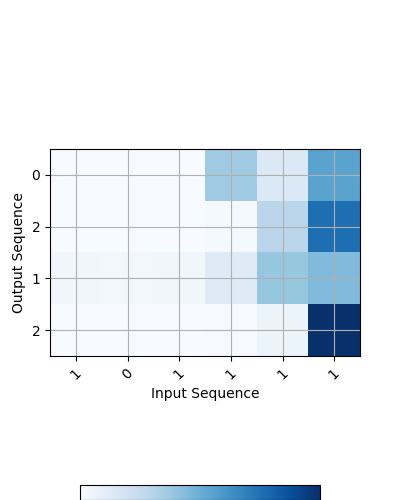

In [8]:
text = '101111'
r, am = plot_attention_map(model, index2word, text, n_s=HPARAMS['hidden_units'], num=7, Tx=6, Ty=4)

[1 0 1 1 0 1]
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]]
4


<IPython.core.display.Javascript object>


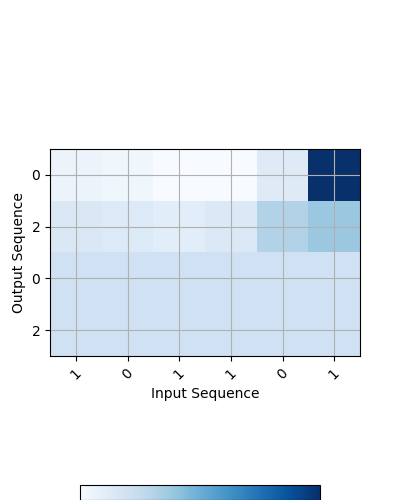

In [9]:
text = '101101'
r, am = plot_attention_map(model, index2word, text, n_s=HPARAMS['hidden_units'], num=7, Tx=6, Ty=4)

In [7]:
am

array([[0.06352073, 0.04688032, 0.01384497, 0.01199533, 0.11027826,
        0.75348037],
       [0.13208802, 0.11914127, 0.08842315, 0.09609215, 0.25126782,
        0.31298763],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

In [ ]:
n_s = 128
num = 7
s0 = np.zeros((1, n_s))
c0 = np.zeros((1, n_s))
layer = model.layers[num]

encoded = text_to_input("101101")

f = K.function(model.inputs, [layer.get_output_at(t) for t in range(4)])
r = f([encoded, s0, c0])
print(r)